# Information Retrieval Subject Text Classifier (STW7071CEM )- Subash Gautam

Task:
Whether as a separate program or integrated with search engine, a subject classification functionality is needed. More specifically, the input is a scientific text and the output is its subject among zero or more of the cases: Health, Sports, Business etc.

This program implements a text classifier using a NLP techniques and a selection of classification algorithms.

Based on the datasets sourced, the three chosen classifications are:

* Business
* Health
* Sports

## Imports

In [ ]:
import os
import string
# Data Handling and Processing
import pandas as pd
import numpy as np
import re
from scipy import interp
# Visualuzation
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
# NLP Packages
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from joblib import dump, load
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
# Scikit Learn packages
from sklearn.base import clone
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold, cross_validate, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Load Datasets

In [ ]:
text_df = pd.DataFrame(columns=['Text','Class'])
# text_df.to_csv('subject_class.csv')
text_df.head()

,Text,Class


In [ ]:
# Function to read the text files into one dataframe
def readfiles_to_dataframe(directory, category):
    arr = os.listdir(directory)
    strtext = ".txt"
    for textfile in arr:
        if textfile.__contains__(strtext):
            fileObject = open(directory + textfile, "r")
            data = fileObject.read()
            ouvert = pd.read_csv('news_df.csv', index_col="Unnamed: 0")
            ouvert = ouvert.append({"Class": str(category), "Text": data},ignore_index=True)
            ouvert.to_csv('news_df.csv')

# Define categories
# paths = [business_path, tech_path, arts_path]
# categories = ['business', 'tech', 'arts']


# # Call readfile function
# for path,category in zip(paths, categories):
#     readfiles_to_dataframe(path, category)

In [ ]:
full_df = pd.read_csv('subject_class.csv')
print(full_df.shape)
full_df.head()

(1490, 7)


,Unnamed: 0,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [ ]:
full_df.drop(columns=['Unnamed: 0'], inplace=True)
full_df.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [ ]:
full_df.drop(columns=['ArticleId'], inplace=True)
full_df.head()

,Text,Category,News_length,Text_parsed,Category_target
0,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [ ]:
full_df.drop(columns=['News_length'], inplace=True)
full_df.head()

,Text,Category,Text_parsed,Category_target
0,worldcom ex-boss launches defence lawyers defe...,business,worldcom exboss launches defence lawyers defen...,0
1,german business confidence slides german busin...,business,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster better ...,4
4,enron bosses in $168m payout eighteen former e...,business,enron bosses 168m payout eighteen former enron...,0


In [ ]:
full_df.drop(columns=['Text_parsed'], inplace=True)
full_df.head()

,Text,Category,Category_target
0,worldcom ex-boss launches defence lawyers defe...,business,0
1,german business confidence slides german busin...,business,0
2,bbc poll indicates economic gloom citizens in ...,business,0
3,lifestyle governs mobile choice faster bett...,tech,4
4,enron bosses in $168m payout eighteen former e...,business,0


In [ ]:
full_df.drop(columns=['Category_target'], inplace=True)
full_df.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


## 1. Dataset Exploration

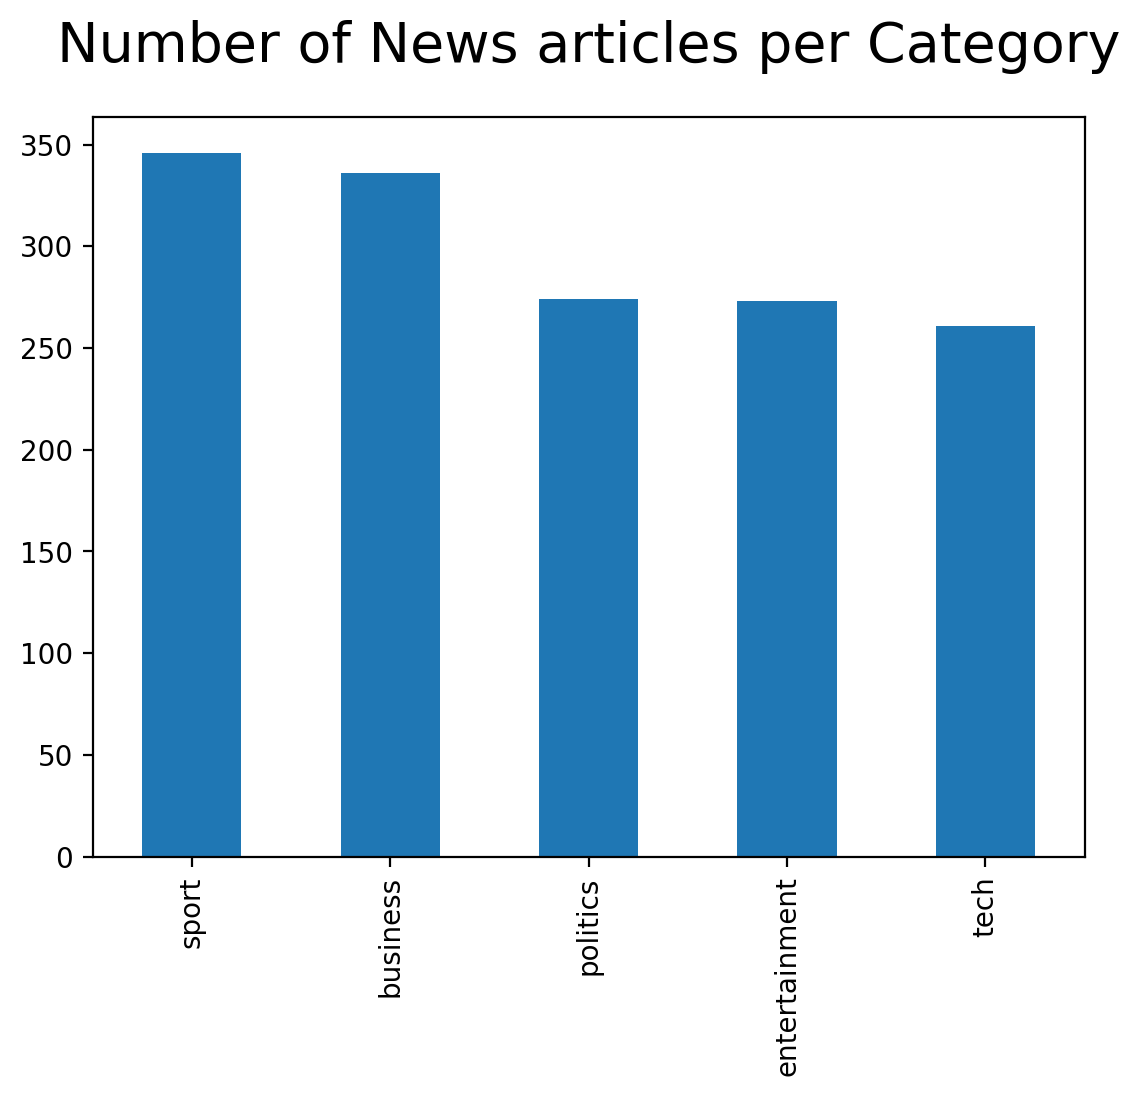

In [ ]:
full_df['Category'].value_counts().plot(kind='bar')
plt.title('Number of News articles per Category', size=20, pad=20);

In [ ]:
# Check for missing values
full_df.isna().sum()

Text        0
Category    0
dtype: int64

## 2. Text Preprocessing

Here, unwanted parts of the text are removed such as special characters.

In [ ]:
def preprocess(df):
    # Remove special characters
    df['Text2'] = df['Text'].replace('\n',' ')
    df['Text2'] = df['Text2'].replace('\r',' ')

    # Remove punctuation signs and lowercase all
    df['Text2'] = df['Text2'].str.lower()
    df['Text2'] = df['Text2'].str.translate(str.maketrans('', '', string.punctuation))


    # Remove stop words
    stop_words = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()

    def fwpt(each):
        tag = pos_tag([each])[0][1][0].upper()
        hash_tag = {"N": wordnet.NOUN,"R": wordnet.ADV, "V": wordnet.VERB,"J": wordnet.ADJ}
        return hash_tag.get(tag, wordnet.NOUN)


    def lematize(text):
        tokens = nltk.word_tokenize(text)
        ax = ""
        for each in tokens:
            if each not in stop_words:
                ax += lemmatizer.lemmatize(each, fwpt(each)) + " "
        return ax

    df['Text2'] = df['Text2'].apply(lematize)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
preprocess(full_df)

### Demonstration of Preprocessing

**Original:**

In [ ]:
full_df.iloc[1]['Text']

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january  its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up.   we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner.  the main reason is probably that the domestic economy is still weak  particularly in the retail trade.  economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline . he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue.  germany s economy grew 1.

**Processed:**

In [ ]:
full_df.iloc[1]['Text2']

'german business confidence slide german business confidence fell february knock hope speedy recovery europe large economy munichbased research institute ifo say confidence index fell 955 february 975 january first decline three month study found outlook manufacturing retail sector worsen observer hop confident business sector would signal economic activity pick surprised ifo index take knock say dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement call dip february ifo confidence figure mild decline say despite retreat index remain relatively high level expect modest economic upswing continue germany economy grow 16 last year shrink 2003 however economy contract 02 last three month 2004 mainly due reluctance consumer spend late indication growth still prove elusive ifo president hanswerner sinn say improvement german domestic demand sluggish export kept thing go first half 2004 demand 

## 3. Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(full_df['Text2'],
                                                    full_df['Category'],
                                                    test_size=0.2,
                                                    random_state=9)

#### Check for acceptable category balance

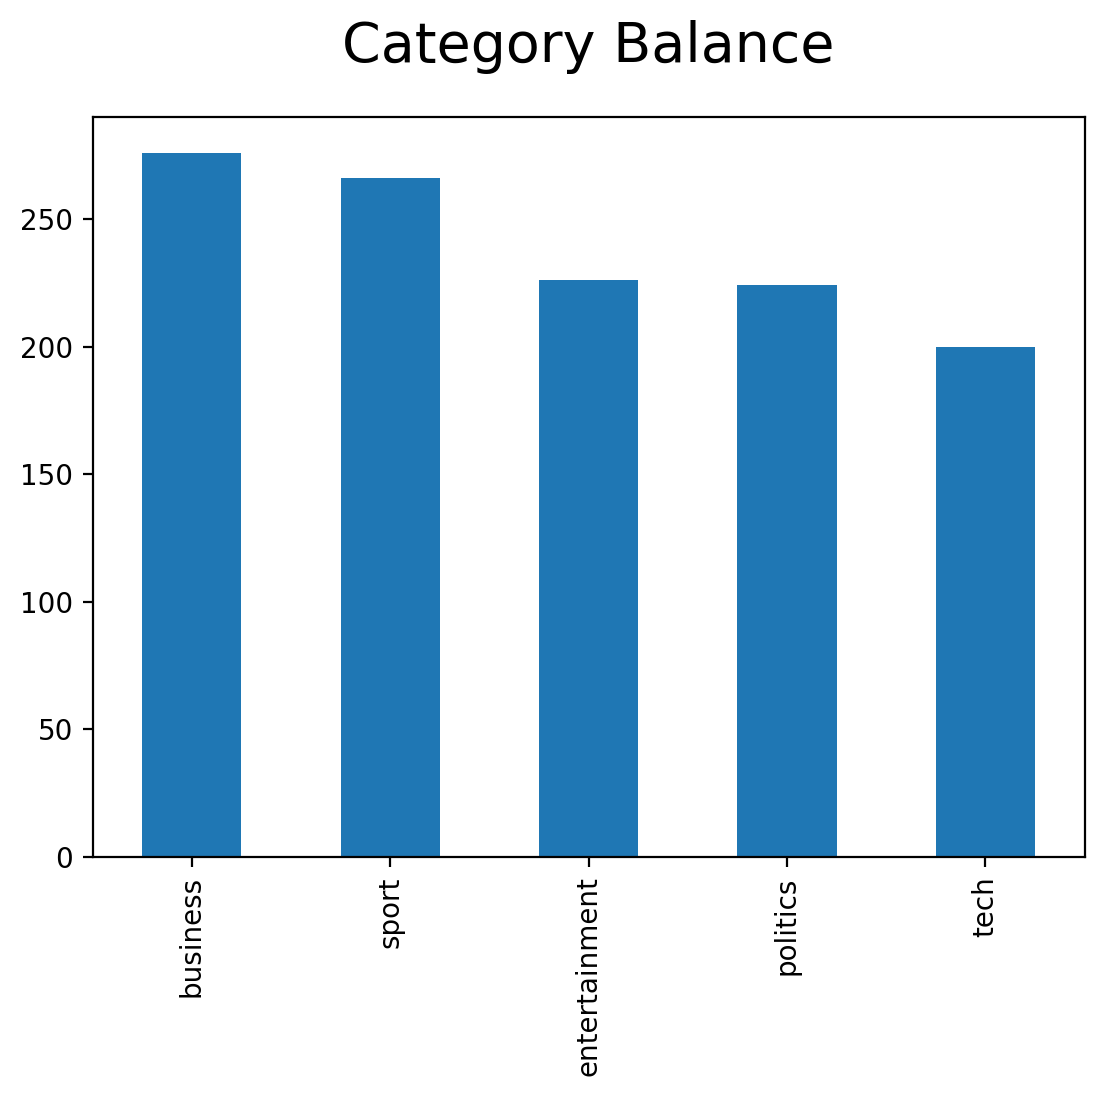

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.title('Category Balance', size=20, pad=20);

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1192,) (298,) (1192,) (298,)


## 4.  Vectorize

In [ ]:
vector = TfidfVectorizer(stop_words='english',
                         ngram_range = (1,2),
                         min_df = 3,
                         max_df = 1.,
                         max_features = 10000)

## 5.  Construct Model

In [ ]:
def fit_model(model, model_name):
    line = Pipeline([('vectorize', vector), (model_name, model)])

    output = cross_validate(line,
                            X_train,
                            y_train,
                            cv = KFold(shuffle = True,
                                       n_splits = 3,
                                       random_state = 9),
                            scoring = ('accuracy', 'f1_weighted','precision_weighted','recall_weighted'),
                            return_train_score=True)
    return output

In [ ]:
dectree = fit_model(DecisionTreeClassifier(), 'DTree')
ridge = fit_model(RidgeClassifier(), 'Ridge')
bayes = fit_model(MultinomialNB(), 'NB')

dt = pd.DataFrame.from_dict(dectree)
rc = pd.DataFrame.from_dict(ridge)
bc = pd.DataFrame.from_dict(bayes)

In [ ]:
l1 = [bc, rc, dt]
l2 =["NB", "Ridge", "DT"]

for each, tag in zip(l1, l2):
    each['model'] = [tag, tag, tag]

joined_output = pd.concat([bc,rc,dt])

In [ ]:
dectree

{'fit_time': array([1.42030883, 0.99307752, 0.92109227]),
 'score_time': array([0.29142141, 0.14311123, 0.14781284]),
 'test_accuracy': array([0.7839196 , 0.79596977, 0.78085642]),
 'train_accuracy': array([1., 1., 1.]),
 'test_f1_weighted': array([0.78325464, 0.7957892 , 0.78068533]),
 'train_f1_weighted': array([1., 1., 1.]),
 'test_precision_weighted': array([0.78479955, 0.8042556 , 0.78071142]),
 'train_precision_weighted': array([1., 1., 1.]),
 'test_recall_weighted': array([0.7839196 , 0.79596977, 0.78085642]),
 'train_recall_weighted': array([1., 1., 1.])}

In [ ]:
ridge

{'fit_time': array([0.79772663, 0.78642988, 0.75445127]),
 'score_time': array([0.21510792, 0.19862771, 0.20438766]),
 'test_accuracy': array([0.97487437, 0.96725441, 0.97984887]),
 'train_accuracy': array([1., 1., 1.]),
 'test_f1_weighted': array([0.97479668, 0.9671171 , 0.97982769]),
 'train_f1_weighted': array([1., 1., 1.]),
 'test_precision_weighted': array([0.97496281, 0.96755714, 0.97995849]),
 'train_precision_weighted': array([1., 1., 1.]),
 'test_recall_weighted': array([0.97487437, 0.96725441, 0.97984887]),
 'train_recall_weighted': array([1., 1., 1.])}

In [ ]:
bayes

{'fit_time': array([0.70424414, 0.7277956 , 0.71391845]),
 'score_time': array([0.15133119, 0.14704728, 0.14641047]),
 'test_accuracy': array([0.96231156, 0.94962217, 0.97732997]),
 'train_accuracy': array([0.99244332, 0.98993711, 0.99245283]),
 'test_f1_weighted': array([0.96222824, 0.94905837, 0.9774422 ]),
 'train_f1_weighted': array([0.99244144, 0.98991807, 0.99243943]),
 'test_precision_weighted': array([0.96337932, 0.95182171, 0.97793337]),
 'train_precision_weighted': array([0.99245494, 0.99011854, 0.99244236]),
 'test_recall_weighted': array([0.96231156, 0.94962217, 0.97732997]),
 'train_recall_weighted': array([0.99244332, 0.98993711, 0.99245283])}

In [ ]:
relevant_measures = list(['test_accuracy','test_precision_weighted', 'test_recall_weighted', 'test_f1_weighted'])

dec_tree_metrics = joined_output.loc[joined_output.model == 'DT'][relevant_measures]
nb_metrics = joined_output.loc[joined_output.model == 'NB'][relevant_measures]
r_metrics = joined_output.loc[joined_output.model == 'Ridge'][relevant_measures]

#### Decision Tree metrics

In [ ]:
dec_tree_metrics

,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
0,0.783920,0.784800,0.783920,0.783255
1,0.795970,0.804256,0.795970,0.795789
2,0.780856,0.780711,0.780856,0.780685


#### Multinomial Naive Bayes metrics

In [ ]:
nb_metrics

,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
0,0.962312,0.963379,0.962312,0.962228
1,0.949622,0.951822,0.949622,0.949058
2,0.977330,0.977933,0.977330,0.977442


#### Ridge Classifier metrics

In [ ]:
r_metrics

,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
0,0.974874,0.974963,0.974874,0.974797
1,0.967254,0.967557,0.967254,0.967117
2,0.979849,0.979958,0.979849,0.979828


#### Average metrics

In [ ]:
metrics_ = [dec_tree_metrics, nb_metrics, r_metrics]
names_ = ['Decision Tree', 'Naive Bayes', 'Ridge Classifier']

for scores, namess in zip(metrics_, names_):
    print(f'{namess} Mean Metrics:')
    print(scores.mean())
    print('  ')

Decision Tree Mean Metrics:
test_accuracy              0.786915
test_precision_weighted    0.789922
test_recall_weighted       0.786915
test_f1_weighted           0.786576
dtype: float64
  
Naive Bayes Mean Metrics:
test_accuracy              0.963088
test_precision_weighted    0.964378
test_recall_weighted       0.963088
test_f1_weighted           0.962910
dtype: float64
  
Ridge Classifier Mean Metrics:
test_accuracy              0.973993
test_precision_weighted    0.974159
test_recall_weighted       0.973993
test_f1_weighted           0.973914
dtype: float64
  


### Selection of Model
From the metrics obtained above, we see that **Ridge Classifier** performs best. However, the **Multinomial Naive Bayes classifier** is chosen to create the final model.

This is because it **has the ability to provide probability score** for each prediction it makes, while scoring similarly to the best model.

In [ ]:
# Join training and test datasets
X = pd.concat([X_train,
               X_test])
y = pd.concat([y_train,
               y_test])

In [ ]:
def create_and_fit(clf, x, y):
    best_clf = clf
    pipeline = Pipeline([('vectorize', vector), ('model', best_clf)])
    return pipeline.fit(x, y)

In [ ]:
# Create model
CLASSYfier = create_and_fit(MultinomialNB(), X, y)

In [ ]:
CLASSYfier.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype='<U13')

## FINAL TESTING:

The first sample text used is a tech news article about streaming services and video games.

The classifier, if appropriate, should classify this as a Sport text.

In [ ]:
input_text = 'Manchester City end interest in West Ham midfielder Declan Rice after having £90m bid rejected; Arsenal have submitted a third bid worth £105m which City are not prepared to match or surpass'
CLASSYfier.predict_proba([input_text])

array([[0.15158012, 0.07091782, 0.07823783, 0.6458866 , 0.05337763]])

In [ ]:
CLASSYfier.predict([input_text])[0]

'sport'

Interestingly, since the streaming services are also businesses, the model reflects this with a `0.39` probability for the business category.

## GUI

In [95]:
import tkinter as tk
from tkinter.scrolledtext import ScrolledText


window = tk.Tk()


window.title("TEXT CLASSIFIER")
window.minsize(600,400)

text_box = ScrolledText(window)
text_box.grid(column=0, row=1, padx=5, pady=5)

def result(res, pr):
    BUSINESS = round(pr[0][0], 3)
    HEALTH = round(pr[0][1], 3)
    SPORT = round(pr[0][2], 3)


    lines = [ f"Business: {BUSINESS}",f"Health: {HEALTH}", f"Sport: {SPORT}"]
    tk.messagebox.showinfo(message= f"Predicted Category: {str(res).capitalize()}" + "\n\n\n"+"\n".join(lines))

def clickMe():
    classification = tk.StringVar()
    category_,probabilities = classify_text(text_box.get("1.0",tk.END))
    result(category_, probabilities)


def classify_text(input_text):
    out = CLASSYfier.predict([input_text])[0]
    probs = CLASSYfier.predict_proba([input_text])
    return out,probs

label = tk.Label(window, text = "Enter Text to be classified")
label.grid(column = 0, row = 0)

btn = tk.Button(window, text="Classify", command=clickMe)
btn.grid(column=0, row=2)




window.mainloop()